In [70]:
import pandas as pd
import matplotlib.pyplot as plt


# Data Reading

In [71]:
df=pd.read_csv('Dataset/Google-Playstore-Cleaned.csv')

In [72]:
df.drop(labels= ['Unnamed: 0'],inplace=True,axis=1)

In [73]:
df.head()

,App Name,Rating,Rating Count,Minimum Installs,Price,Size,Minimum Android,Ad Supported,In App Purchases,Editors Choice,...,Category_Books & Reference,Category_Business,Category_Education,Category_Entertainment,Category_Finance,Category_Lifestyle,Category_Music & Audio,Category_Personalization,Category_Productivity,Category_Tools
0,Hill Track Online Shopping,5.0,7.0,10,0.0,1.7,4.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Funny Santa Claus LWP,4.9,14.0,10000,0.0,19.0,5.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Haul NOW,4.2,10.0,1000,0.0,8.6,4.1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Pixel Measure,4.0,45.0,1000,0.0,3.0,5.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Niffler wallpaper HD,4.4,13.0,1000,0.0,7.7,4.1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [74]:
bins = [ 0, 1.0, 2.0, 3.0, 4.0 , 5.0]
new_df=pd.read_csv("Dataset/Google-Playstore-Cleaned.csv")
new_df.drop(labels= ['Unnamed: 0'],inplace=True,axis=1)
new_df['Binned_Rating'] = pd.cut(df['Rating'], bins)

In [75]:
new_df.drop(labels= ['Rating'],inplace=True,axis=1)

In [76]:
new_df

,App Name,Rating Count,Minimum Installs,Price,Size,Minimum Android,Ad Supported,In App Purchases,Editors Choice,Content Rating_Adults only 18+,...,Category_Business,Category_Education,Category_Entertainment,Category_Finance,Category_Lifestyle,Category_Music & Audio,Category_Personalization,Category_Productivity,Category_Tools,Binned_Rating
0,Hill Track Online Shopping,7.0,10,0.0,1.7,4.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"(4.0, 5.0]"
1,Funny Santa Claus LWP,14.0,10000,0.0,19.0,5.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,"(4.0, 5.0]"
2,Haul NOW,10.0,1000,0.0,8.6,4.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,"(4.0, 5.0]"
3,Pixel Measure,45.0,1000,0.0,3.0,5.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,"(3.0, 4.0]"
4,Niffler wallpaper HD,13.0,1000,0.0,7.7,4.1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,"(4.0, 5.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80815,Telugu jesus Songs,63.0,10000,0.0,28.0,4.1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,"(4.0, 5.0]"
80816,JS Cards,8.0,1000,0.0,7.3,4.1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,"(3.0, 4.0]"
80817,Siren Head Video Call and Chat,19.0,1000,0.0,21.0,4.1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,"(3.0, 4.0]"
80818,Furniture Mods For Minecraft PE,7.0,1000,0.0,28.0,4.4,1,1,0,0,...,0,0,1,0,0,0,0,0,0,"(3.0, 4.0]"


# Data Pre-Processing

In [77]:
new_df.columns[25]


'Binned_Rating'

In [78]:
new_df['Binned_Rating']=new_df['Binned_Rating'].astype('str')

In [79]:
ordinal_mapping = {'(0.0, 1.0]' : 0, '(1.0, 2.0]' : 1, '(2.0, 3.0]': 2,'(3.0, 4.0]':3,'(4.0, 5.0]':4}
new_df['Binned_Rating'] = new_df['Binned_Rating'].map(ordinal_mapping)

In [82]:
new_df['Binned_Rating'].value_counts()

4    50311
3    22923
2     6238
1     1307
0       41
Name: Binned_Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x22fe0fc6e10>,
 [Text(-1.8536971573159815, -0.7508707271952004, '4'),
  Text(1.9919077323512022, 0.17973198324030268, '3'),
  Text(0.6806788775697692, 1.880605292354129, '2'),
  Text(0.10793269886520598, 1.9970855095652946, '1'),
  Text(0.001912592173991031, 1.1999984758286888, '0')],
 [Text(-1.3902728679869862, -0.5631530453964002, '62%'),
  Text(1.4939307992634014, 0.134798987430227, '28%'),
  Text(0.5105091581773269, 1.4104539692655966, '8%'),
  Text(0.0809495241489045, 1.4978141321739709, '2%'),
  Text(0.0011156787681614346, 0.6999991109000684, '0%')])

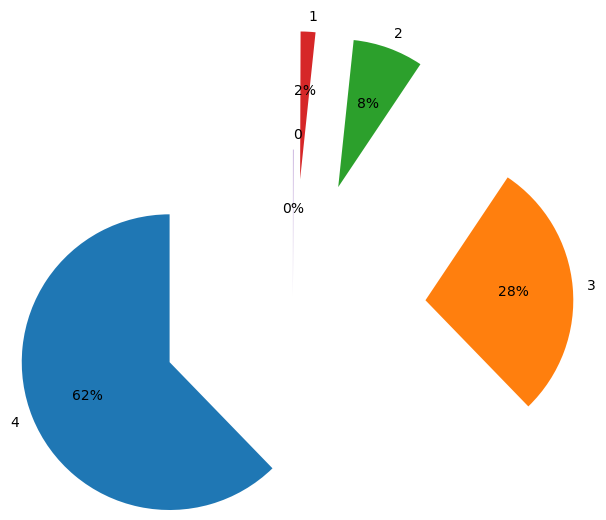

In [92]:
explode = (0.9, 0.9, 0.9,0.9,0.1)
plt.pie(new_df['Binned_Rating'].value_counts(), labels=new_df['Binned_Rating'].value_counts().index, autopct='%1.0f%%', startangle=90,explode=explode)

In [55]:
new_df

,App Name,Rating Count,Minimum Installs,Price,Size,Minimum Android,Ad Supported,In App Purchases,Editors Choice,Content Rating_Adults only 18+,...,Category_Business,Category_Education,Category_Entertainment,Category_Finance,Category_Lifestyle,Category_Music & Audio,Category_Personalization,Category_Productivity,Category_Tools,Binned_Rating
0,Hill Track Online Shopping,7.0,10,0.0,1.7,4.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
1,Funny Santa Claus LWP,14.0,10000,0.0,19.0,5.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,4
2,Haul NOW,10.0,1000,0.0,8.6,4.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4
3,Pixel Measure,45.0,1000,0.0,3.0,5.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,3
4,Niffler wallpaper HD,13.0,1000,0.0,7.7,4.1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80815,Telugu jesus Songs,63.0,10000,0.0,28.0,4.1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,4
80816,JS Cards,8.0,1000,0.0,7.3,4.1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
80817,Siren Head Video Call and Chat,19.0,1000,0.0,21.0,4.1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,3
80818,Furniture Mods For Minecraft PE,7.0,1000,0.0,28.0,4.4,1,1,0,0,...,0,0,1,0,0,0,0,0,0,3


In [56]:
features = new_df.columns[1:25]
labels = new_df.columns[25]
X = new_df.loc[:,features]



y = new_df.loc[:,labels]

In [57]:
from sklearn.model_selection import train_test_split

# Assuming 'data' contains both features and labels
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [58]:
x_train

,Rating Count,Minimum Installs,Price,Size,Minimum Android,Ad Supported,In App Purchases,Editors Choice,Content Rating_Adults only 18+,Content Rating_Everyone,...,Category_Books & Reference,Category_Business,Category_Education,Category_Entertainment,Category_Finance,Category_Lifestyle,Category_Music & Audio,Category_Personalization,Category_Productivity,Category_Tools
12409,660.0,100000,0.0,37.0,4.1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12393,23.0,100,0.0,24.0,5.0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
53405,12.0,500,0.0,16.0,5.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
43365,17.0,1,0.0,91.0,4.1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
42716,11.0,50,0.0,5.2,5.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,22.0,1000,0.0,19.0,4.1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
54886,14.0,1000,0.0,11.0,5.0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
76820,22.0,100,0.0,1.7,2.3,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
860,10.0,1000,0.0,25.0,5.1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [59]:
from sklearn.preprocessing import StandardScaler
columns_to_standardize = x_train.columns[0:5] 
new_columns_to_standardize=columns_to_standardize.append(x_train.columns[13:14])



columns_to_standardize.append(x_train.columns[13:14])
print(new_columns_to_standardize)


Index(['Rating Count', 'Minimum Installs', 'Price', 'Size', 'Minimum Android',
       'Days Since Last Updated'],
      dtype='object')


In [60]:
scaler = StandardScaler()
x_train[new_columns_to_standardize] = scaler.fit_transform(x_train[new_columns_to_standardize])

In [61]:
x_train.head()

,Rating Count,Minimum Installs,Price,Size,Minimum Android,Ad Supported,In App Purchases,Editors Choice,Content Rating_Adults only 18+,Content Rating_Everyone,...,Category_Books & Reference,Category_Business,Category_Education,Category_Entertainment,Category_Finance,Category_Lifestyle,Category_Music & Audio,Category_Personalization,Category_Productivity,Category_Tools
12409,-0.022982,0.001226,-0.033136,0.867386,-0.303325,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12393,-0.046310,-0.039659,-0.033136,0.283553,0.727669,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
53405,-0.046713,-0.039496,-0.033136,-0.075728,0.727669,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
43365,-0.046530,-0.039700,-0.033136,3.292534,-0.303325,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
42716,-0.046749,-0.039680,-0.033136,-0.560757,0.727669,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


# Training

In [62]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [63]:

rf_classifier = RandomForestClassifier(max_features='auto',max_depth=20,n_estimators=100,min_samples_leaf=4,min_samples_split=5)

In [64]:

rf_classifier.fit(x_train, y_train)

d:\Studies\Semester 7\DS\Practice\TestLab\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=20, max_features='auto', min_samples_leaf=4,
                       min_samples_split=5)

In [65]:

y_pred = rf_classifier.predict(x_test)

In [66]:
y_trainpred = rf_classifier.predict(x_train)
classification_report_result = classification_report(y_train, y_trainpred)
print("Classification Report:\n", classification_report_result)

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.00      0.00      0.00      1068
           2       0.93      0.01      0.02      5030
           3       0.70      0.39      0.50     18308
           4       0.72      0.97      0.82     40216

    accuracy                           0.72     64656
   macro avg       0.47      0.27      0.27     64656
weighted avg       0.72      0.72      0.66     64656



d:\Studies\Semester 7\DS\Practice\TestLab\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Studies\Semester 7\DS\Practice\TestLab\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Studies\Semester 7\DS\Practice\TestLab\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
y_pred=rf_classifier.predict(x_test)

In [68]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)


d:\Studies\Semester 7\DS\Practice\TestLab\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Studies\Semester 7\DS\Practice\TestLab\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Studies\Semester 7\DS\Practice\TestLab\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_result)

Accuracy: 0.59
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00       239
           2       0.00      0.00      0.00      1208
           3       0.31      0.16      0.21      4615
           4       0.64      0.87      0.74     10095

    accuracy                           0.59     16164
   macro avg       0.19      0.21      0.19     16164
weighted avg       0.49      0.59      0.52     16164

